# Clasificador K-Nearest Neighbors (KNN)

En este notebook se implementara un modelo de clasificación **K-Nearest Neighbors (KNN)** utilizando el dataset de **cáncer de mama (Breast Cancer)** disponible en `scikit-learn`.

---

## Fundamentos de la técnica

El algoritmo **K-Nearest Neighbors (KNN)** es un método supervisado basado en la **similitud** entre muestras.  
Para clasificar un nuevo punto, el algoritmo:

1. Calcula la distancia entre el nuevo punto y todos los ejemplos de entrenamiento.  
2. Toma los **K vecinos más cercanos**.  
3. Asigna la clase más frecuente entre ellos.  

KNN no “aprende” una función como otros clasificadores; en cambio, **almacena los datos de entrenamiento** y los utiliza directamente para clasificar nuevos ejemplos.

## Modelo Matemático

Sea el conjunto de entrenamiento:

$$
D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}
$$

donde \(x_i \in \mathbb{R}^m\) representa el vector de características de la muestra \(i\) y \(y_i\) su etiqueta de clase.

Para un nuevo patrón \(x_q\):

1. Se calcula la **distancia euclidiana** entre \(x_q\) y cada muestra \(x_i\):

$$
d(x_q, x_i) = \sqrt{\sum_{j=1}^{m} (x_{qj} - x_{ij})^2}
$$

2. Se seleccionan los **K vecinos más cercanos**:

$$
N_k(x_q) = \text{conjunto de los } K \text{ vecinos más próximos a } x_q
$$

3. La clase se asigna mediante votación mayoritaria:

$$
\hat{y} = \text{mode}\left( \{y_i : x_i \in N_k(x_q)\} \right)
$$

## Descripción de la librería

Scikit-learn es una biblioteca de Python diseñada para el aprendizaje automático (Machine Learning). Ofrece herramientas simples y eficientes para clasificación, regresión, agrupamiento y reducción de dimensionalidad.

Está construida sobre NumPy, SciPy y matplotlib, lo que le permite manejar datos numéricos y realizar análisis estadísticos con facilidad.

Incluye implementaciones listas para usar de algoritmos como k-Nearest Neighbors (kNN), Perceptrón, Regresión lineal, SVM, Árboles de decisión, entre otros. Además, proporciona funciones para preprocesar datos, evaluar modelos y crear pipelines que facilitan el flujo completo del entrenamiento y prueba de modelos.

Por su simplicidad y buen rendimiento, es una de las bibliotecas más usadas en el ámbito académico y profesional para tareas de Machine Learning en Python.

## Funciones empleadas

Para la implementación se utiliza la librería **scikit-learn**, ampliamente usada en aprendizaje automático en Python.

Las principales clases y funciones utilizadas son:

- **`load_breast_cancer`**: carga el dataset de cáncer de mama.  
- **`train_test_split`**: divide los datos en conjuntos de entrenamiento y prueba.  
- **`StandardScaler`**: normaliza las características para que tengan media 0 y desviación estándar 1.  
- **`KNeighborsClassifier`**: implementa el modelo KNN.  
- **`accuracy_score`**, **`confusion_matrix`** y **`classification_report`**: permiten evaluar el desempeño del modelo.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pipeline del modelo KNN

A continuación se describe el flujo completo del modelo, dividido en las siguientes etapas:

1. **Preprocesamiento**  
2. **Feature Engineering**  
3. **Model Training**  
4. **Prediction**  
5. **Model Evaluation**

### Preprocesamiento

En esta etapa se realiza:

- Carga del dataset.  
- Análisis estadístico descriptivo (media, desviación estándar, mínimo, máximo).  
- Visualización mediante un **gráfico de dispersión** para observar la relación entre dos características.

## Carga y exploración del dataset

Se usara el dataset **Breast Cancer Wisconsin** incluido en `scikit-learn`, el cual contiene 569 muestras con 30 características.

,mean,std,min,max
mean radius,14.127292,3.524049,6.981000,28.11000
mean texture,19.289649,4.301036,9.710000,39.28000
mean perimeter,91.969033,24.298981,43.790000,188.50000
mean area,654.889104,351.914129,143.500000,2501.00000
mean smoothness,0.096360,0.014064,0.052630,0.16340
mean compactness,0.104341,0.052813,0.019380,0.34540
mean concavity,0.088799,0.079720,0.000000,0.42680
mean concave points,0.048919,0.038803,0.000000,0.20120
mean symmetry,0.181162,0.027414,0.106000,0.30400
mean fractal dimension,0.062798,0.007060,0.049960,0.09744


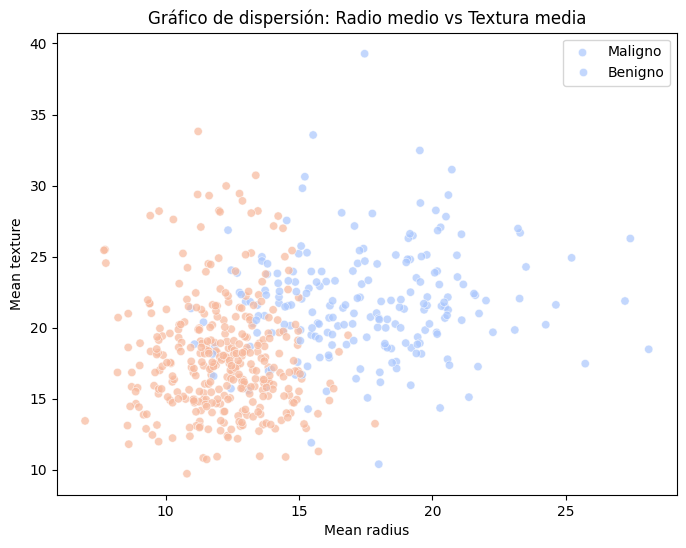

In [2]:
# Cargar dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Estadísticas básicas
display(df.describe().T[["mean", "std", "min", "max"]])

# Gráfico de dispersión entre dos variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["mean radius"], y=df["mean texture"], hue=df["target"], palette="coolwarm", alpha=0.7)
plt.title("Gráfico de dispersión: Radio medio vs Textura media")
plt.xlabel("Mean radius")
plt.ylabel("Mean texture")
plt.legend(["Maligno", "Benigno"])
plt.show()

### Feature Engineering

El dataset contiene 30 variables numéricas. Para simplificar, se pueden usar todas, o bien seleccionar un subconjunto basado en su relevancia o correlación.

En este caso, se emplearán **todas las características** para maximizar el poder predictivo del modelo.

In [3]:
# Separación de variables
X = data.data
y = data.target

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Entrenamiento del modelo

In [4]:
# Crear y entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


### Predicción

Definimos una función que reciba un patrón (vector de características) y devuelva la clase predicha.

In [5]:
def predecir_patron(modelo, patron):
    patron = np.array(patron).reshape(1, -1)
    pred = modelo.predict(patron)[0]
    clase = "Benigno" if pred == 1 else "Maligno"
    print(f"Clase predicha: {clase} ({pred})")
    return clase

### Evaluación del modelo

Se evalúa el desempeño mediante:

- **Matriz de Confusión**  
- **Exactitud (Accuracy)**  
- **Reporte de clasificación**

Accuracy del modelo: 0.9561

Reporte de clasificación:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



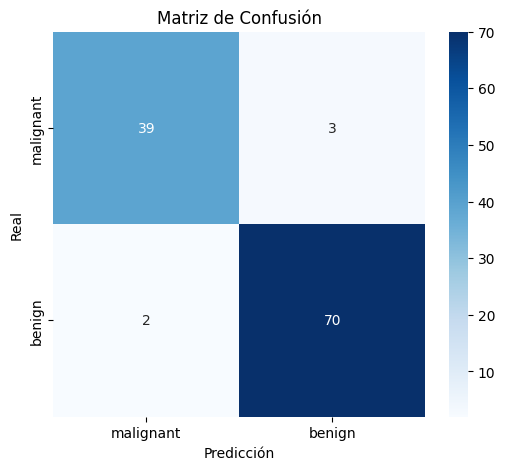

In [6]:
# Predicciones del modelo
y_pred = knn.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy del modelo: {acc:.4f}\n")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Conclusiones

El algoritmo k-Nearest Neighbors (kNN) es uno de los clasificadores más simples pero también más intuitivos dentro del aprendizaje automático supervisado. Su principio fundamental —basarse en la similitud entre muestras— lo convierte en un método fácil de interpretar y útil para obtener una primera aproximación a los datos.

A través del experimento realizado, se puede observar que el desempeño del modelo depende en gran medida de:

La elección del parámetro 
𝑘
k, ya que un valor demasiado bajo puede llevar al sobreajuste (overfitting), mientras que uno muy alto puede provocar pérdida de precisión al suavizar en exceso los límites de decisión.

La calidad y escala de los datos, pues kNN utiliza medidas de distancia (como Euclidiana), por lo que las variables con mayor magnitud pueden dominar la clasificación si no se normalizan adecuadamente.

El análisis estadístico previo (promedios, desviaciones estándar, valores máximos y mínimos) permitió comprender la distribución de los datos y justificar la necesidad del preprocesamiento. Por su parte, el uso de métricas como la matriz de confusión y la accuracy ayudó a evaluar objetivamente el rendimiento del modelo, mostrando fortalezas y posibles limitaciones frente a otros clasificadores más sofisticados.

## Referencias

https://medium.com/@draj0718/k-nearest-neighbor-knn-using-python-d0a6bb295e7d

https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4